# Yearly model

In [8]:
import torch
from torch import autograd, nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler

# Pre-process data

In [9]:
data = pd.read_csv('data.csv',sep=";")
data = data[1828:]

print(data['% FULL'].mean())
display(data)
scaler1 = MinMaxScaler(feature_range=(-1, 1))
data['% FULL']=scaler1.fit_transform(data['% FULL'].values.reshape(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))
data['Brent (eur/bbl)']=scaler2.fit_transform(data['Brent (eur/bbl)'].values.reshape(-1, 1))
scaler3 = MinMaxScaler(feature_range=(-1, 1))
data['Coal (eur/t)']=scaler3.fit_transform(data['Coal (eur/t)'].values.reshape(-1, 1))
scaler4 = MinMaxScaler(feature_range=(-1, 1))
data['CO2 (eur/t)']=scaler4.fit_transform(data['CO2 (eur/t)'].values.reshape(-1, 1))
scaler5 = MinMaxScaler(feature_range=(-1, 1))
data['month']=scaler5.fit_transform(data['month'].values.reshape(-1, 1))
scaler6 = MinMaxScaler(feature_range=(-1, 1))
data['5M lagged Brent (usd/bbl)']=scaler6.fit_transform(data['5M lagged Brent (usd/bbl)'].values.reshape(-1, 1))

data_train = data.iloc[:int(data.shape[0]*0.9)]
data_test = data.iloc[int(1+data.shape[0]*0.9):]
display(data_train)

X_train= torch.Tensor(data_train[['month','% FULL','Brent (eur/bbl)','5M lagged Brent (usd/bbl)','Coal (eur/t)','CO2 (eur/t)']].astype(np.float32).values)
y_train= torch.tensor(data_train['TTF (eur/Mwh)'].astype(np.float32).values)

X_test= torch.Tensor(data_test[['month','% FULL','Brent (eur/bbl)','5M lagged Brent (usd/bbl)','Coal (eur/t)','CO2 (eur/t)']].astype(np.float32).values)
y_test= torch.tensor(data_test['TTF (eur/Mwh)'].astype(np.float32).values)

58.79648361381755


,date,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),TTF (eur/Mwh)
1828,3/01/2016,1,69.09,34.334132,46.213853,46.63,8.22,14.62
1829,4/01/2016,1,68.52,34.370671,46.076330,46.55,8.04,14.68
1830,5/01/2016,1,67.95,33.891681,45.956147,46.10,7.99,14.70
1831,6/01/2016,1,67.43,31.759139,45.811560,46.90,7.74,15.18
1832,7/01/2016,1,66.88,30.867020,45.666239,47.50,7.54,15.38
1833,8/01/2016,1,66.39,30.698143,45.519725,46.10,7.41,14.57
1834,9/01/2016,1,66.02,30.698143,45.519725,46.10,7.41,14.57
1835,10/01/2016,1,65.70,30.698143,45.519725,46.10,7.41,14.57
1836,11/01/2016,1,65.25,29.054241,45.363211,45.70,7.12,14.48
1837,12/01/2016,1,64.84,28.431915,45.183853,45.00,7.10,14.05


C:\Users\j649957\AppData\Local\conda\conda\envs\env1\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,date,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),TTF (eur/Mwh)
1828,3/01/2016,-1.000000,0.398664,-0.647885,-0.565165,-0.871692,-0.596425,14.62
1829,4/01/2016,-1.000000,0.383127,-0.646412,-0.572176,-0.874372,-0.613358,14.68
1830,5/01/2016,-1.000000,0.367589,-0.665730,-0.578303,-0.889447,-0.618062,14.70
1831,6/01/2016,-1.000000,0.353414,-0.751741,-0.585674,-0.862647,-0.641580,15.18
1832,7/01/2016,-1.000000,0.338422,-0.787722,-0.593082,-0.842546,-0.660395,15.38
1833,8/01/2016,-1.000000,0.325065,-0.794534,-0.600552,-0.889447,-0.672625,14.57
1834,9/01/2016,-1.000000,0.314979,-0.794534,-0.600552,-0.889447,-0.672625,14.57
1835,10/01/2016,-1.000000,0.306256,-0.794534,-0.600552,-0.889447,-0.672625,14.57
1836,11/01/2016,-1.000000,0.293989,-0.860836,-0.608531,-0.902848,-0.699906,14.48
1837,12/01/2016,-1.000000,0.282813,-0.885936,-0.617675,-0.926298,-0.701787,14.05


# Neural network

In [10]:
class Net(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size,hidden3_size, hidden4_size, hidden5_size, num_classes):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden3_size, hidden4_size)  
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden4_size, hidden5_size)  
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(hidden5_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        out = self.relu5(out)
        out = self.fc6(out)
        return out

# Train it!

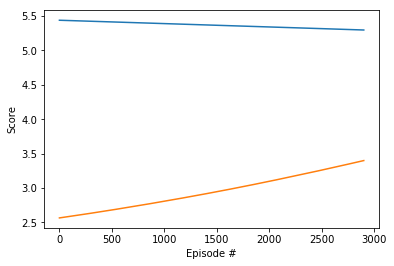

In [4]:
net = Net(6,640,640,640,640,640, 1)
try:
    net.load_state_dict(torch.load('yearly_model.pth'))
    net.train()
except:
    print("can't load model")
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

loss_train_arr = []
loss_test_arr = []

for epoch in range(3000):
    #do the forward propagation
    out_train = net(X_train)
    out_test = net(X_test)

    # Out loss function
    loss_train = F.mse_loss(out_train.view(1, -1), y_train.float().view(1, -1))
    loss_train_arr.append(loss_train)
    loss_test = F.mse_loss(out_test.view(1, -1), y_test.float().view(1, -1))
    loss_test_arr.append(loss_test)
    #print(loss_train, loss_test)

    # Our optimizer
    
    #optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

    #do back propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()

torch.save(net.state_dict(),'yearly_model.pth')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[100:])), loss_train_arr[100:])
plt.plot(np.arange(len(loss_test_arr[100:])), loss_test_arr[100:])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


# Test it!

[[27.122583]
 [26.99961 ]
 [27.42901 ]
 [27.439615]
 [27.455105]
 [27.46946 ]
 [27.65495 ]
 [27.121605]
 [27.356133]
 [27.087557]
 [26.673527]
 [26.671787]
 [26.674686]
 [26.359835]
 [25.95135 ]
 [25.883621]
 [25.332077]
 [25.600351]
 [25.601637]
 [25.604855]
 [25.504097]
 [25.177841]
 [25.445768]
 [25.407585]
 [25.066372]
 [25.060951]
 [25.06705 ]
 [25.71595 ]
 [24.717857]
 [24.300575]
 [24.158863]
 [24.083122]
 [24.070438]
 [24.05589 ]
 [23.32499 ]
 [23.074911]
 [23.202667]
 [23.241241]
 [22.636543]
 [22.617966]
 [22.601414]
 [22.49625 ]
 [22.330742]
 [22.244465]
 [22.435991]
 [22.746696]
 [23.487614]
 [23.48136 ]
 [23.655777]
 [23.715271]
 [23.311428]
 [23.230572]
 [23.440212]
 [23.43457 ]
 [23.428661]
 [23.640842]
 [23.374695]
 [23.802502]
 [24.51725 ]
 [24.88929 ]
 [24.87203 ]
 [24.855347]
 [25.473797]
 [24.904045]
 [25.031805]
 [24.513779]
 [24.616692]
 [24.611176]
 [24.605402]
 [24.539555]
 [24.53873 ]
 [24.62873 ]
 [24.109224]
 [23.917542]
 [23.911438]
 [23.907906]
 [23.920652]

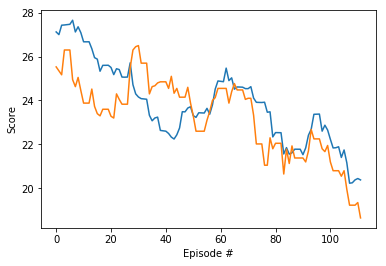

In [11]:
net = Net(6,640,640,640,640,640, 1)
try:
    net.load_state_dict(torch.load('yearly_model.pth'))
    net.train()
except:
    print("can't load model")
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

out = net(X_test).data.numpy()
print(out)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(out)), out)
plt.plot(np.arange(len(y_test)), y_test.data.numpy())
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Use it!

,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),current TTF_forward
0,3,34.259839,54.116945,63.1034,75.20,23.33,18.912
1,4,33.110583,53.989891,60.6257,73.95,23.34,18.631
2,5,40.835040,53.880233,60.6314,74.85,23.36,18.528
3,6,51.285125,53.544265,61.6146,75.60,23.39,18.473
4,7,61.956210,52.930707,61.6160,76.80,23.44,18.432
5,8,73.162702,52.442572,61.5860,76.95,23.48,18.482
6,9,81.766375,51.603741,61.5420,77.25,23.62,18.832
7,10,86.372379,50.835522,61.4820,77.90,23.72,20.014
8,11,84.723542,50.121440,61.4200,78.55,23.82,21.489
9,12,73.736895,50.080551,61.3560,79.20,23.91,21.933


,month,% FULL,Brent (eur/bbl),5M lagged Brent (usd/bbl),Coal (eur/t),CO2 (eur/t),current TTF_forward,predicted TTF,market premium
0,3,34.259839,54.116945,63.1034,75.20,23.33,18.912,19.365108,-0.453108
1,4,33.110583,53.989891,60.6257,73.95,23.34,18.631,18.242836,0.388164
2,5,40.835040,53.880233,60.6314,74.85,23.36,18.528,17.299934,1.228066
3,6,51.285125,53.544265,61.6146,75.60,23.39,18.473,16.905531,1.567469
4,7,61.956210,52.930707,61.6160,76.80,23.44,18.432,16.959839,1.472161
5,8,73.162702,52.442572,61.5860,76.95,23.48,18.482,17.642036,0.839964
6,9,81.766375,51.603741,61.5420,77.25,23.62,18.832,18.601437,0.230563
7,10,86.372379,50.835522,61.4820,77.90,23.72,20.014,19.509075,0.504925
8,11,84.723542,50.121440,61.4200,78.55,23.82,21.489,20.142525,1.346475
9,12,73.736895,50.080551,61.3560,79.20,23.91,21.933,20.600407,1.332593


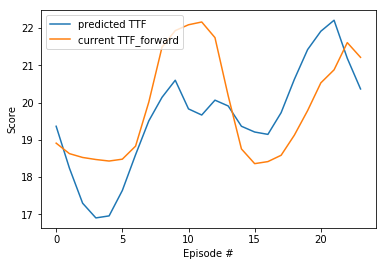

In [12]:
cases = pd.read_csv('Cases.csv',sep=";")
display(cases)
net = Net(6,640,640,640,640,640, 1)
net.load_state_dict(torch.load('yearly_model.pth'))
net.eval()

TTF_pred = []
market_premium = []


for i in range(0,cases.shape[0]):    
    columns = ['month','% FULL','Brent (eur/bbl)','5M lagged Brent (usd/bbl)','Coal (eur/t)','CO2 (eur/t)']
    X_use = pd.DataFrame(columns=columns)    
    X_use['month'] = [cases["month"].iloc[i]]
    X_use["% FULL"] = [cases["% FULL"].iloc[i]]
    X_use['Brent (eur/bbl)'] = [cases['Brent (eur/bbl)'].iloc[i]]
    X_use['Coal (eur/t)'] = [cases['Coal (eur/t)'].iloc[i]]
    X_use['CO2 (eur/t)'] = [cases['CO2 (eur/t)'].iloc[i]]
    X_use['5M lagged Brent (usd/bbl)'] = [cases['5M lagged Brent (usd/bbl)'].iloc[i]]

    X_use['% FULL']=scaler1.transform(X_use['% FULL'].values.reshape(-1, 1))
    X_use['Brent (eur/bbl)']=scaler2.transform(X_use['Brent (eur/bbl)'].values.reshape(-1, 1))
    X_use['Coal (eur/t)']=scaler3.transform(X_use['Coal (eur/t)'].values.reshape(-1, 1))
    X_use['CO2 (eur/t)']=scaler4.transform(X_use['CO2 (eur/t)'].values.reshape(-1, 1))
    X_use['month'] = scaler5.transform(X_use['month'].values.reshape(-1, 1))
    X_use['5M lagged Brent (usd/bbl)'] = scaler6.transform(X_use['5M lagged Brent (usd/bbl)'].values.reshape(-1, 1))

    X_use= torch.Tensor(X_use.astype(np.float32).values)
    out = net(X_use).data.numpy()
    TTF_pred.append(out[0][0])
    market_premium.append(cases["current TTF_forward"].iloc[i] - out[0][0])
    #print("predicted price: ",out[0][0])
    
cases["predicted TTF"] = TTF_pred
cases["market premium"] = market_premium
display(cases)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(cases["predicted TTF"])), cases["predicted TTF"],label='predicted TTF')
plt.plot(np.arange(len(cases["current TTF_forward"])), cases["current TTF_forward"],label='current TTF_forward')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()